In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Step 1: Data Preparation
# Assuming you have the Google stock prices dataset in a CSV file
data = pd.read_csv('Google_Stock_Price_Test.csv')
prices = data['Close'].values.reshape(-1, 1)

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [4]:

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [22]:
# Step 2: Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(None, 1), return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

In [23]:
# Step 3: Model Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_data[:-1], train_data[1:], epochs=50, batch_size=32)

Epoch 1/50
1/1 [==============================] - 12s 12s/step - loss: 0.2389
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2338
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2287
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2236
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2185
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2134
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2083
Epoch 8/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2032
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1981
Epoch 10/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1929
Epoch 11/50
1/1 [==============================] - 0s 34ms/step - loss: 0.1877
Epoch 12/50
1/1 [==============================] - 0s 20ms/step - loss: 0.1825
Epoch 13/50
1/1 [==============================] - 0s 20ms/st

In [24]:
# Step 4: Model Evaluation
train_loss = model.evaluate(train_data[:-1], train_data[1:])
test_loss = model.evaluate(test_data[:-1], test_data[1:])
print(f"Training loss: {train_loss}")
print(f"Testing loss: {test_loss}")

1/1 [==============================] - 0s 83ms/step - loss: 0.0615
Training loss: 0.026336567476391792
Testing loss: 0.06153269484639168


In [37]:
# Step 5: Prediction
predictions = model.predict(test_data[:-1].reshape(-1, 1, 1))
predicted_prices = scaler.inverse_transform(predictions).flatten()

1/1 [==============================] - 0s 63ms/step


In [38]:
next_price = predicted_prices[-1]
print(f"Predicted price for the next time step: {next_price}")

Predicted price for the next time step: 809.4248657226562


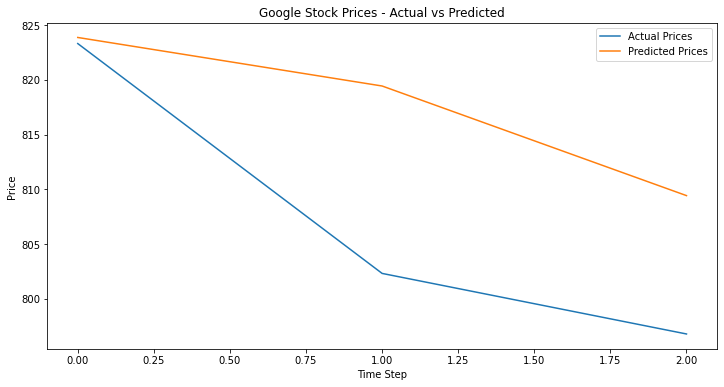

In [40]:
# Step 6: Visualization
actual_prices = scaler.inverse_transform(test_data[1:]).flatten()

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(len(actual_prices)), predicted_prices, label='Predicted Prices')
plt.title('Google Stock Prices - Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()



In [42]:
# Step 6: Accuracy Calculation
actual_prices = scaler.inverse_transform(test_data[1:]).flatten()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.74%
